<a href="https://colab.research.google.com/github/Subhendu0802/word_cloud/blob/main/Word_cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

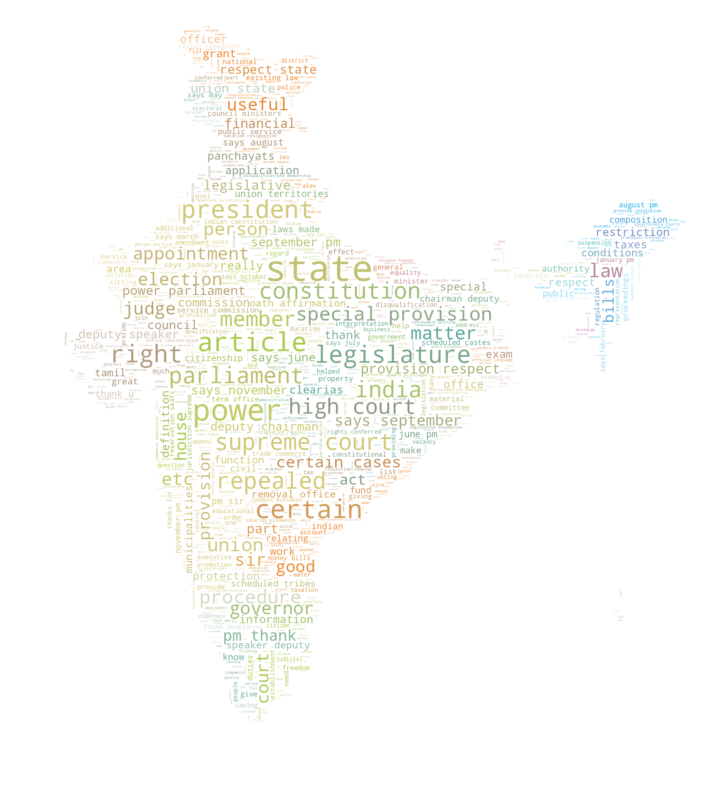

In [16]:
from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud.wordcloud import WordCloud
from wordcloud import ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import os
from os import path, getcwd
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def get_soup(html):
    # Get data from webpage
    resp = requests.get(html)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type','').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, 'html.parser', from_encoding=encoding)
    return soup

def get_links(soup):
    # Get links from web page
    http_link_list = []
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/':
            http_link_list.append(link['href'].strip("'"))
    return http_link_list

def get_ps(soup):
    # Get <p> tags from web page
    http_link_list = []
    for link in soup.find_all('p'):
        http_link_list.append(link.get_text())
    return http_link_list

def get_text(text_array):
    # Get text from the array
    text = " ".join(text_array)
    return text

def punctuation_stop(text):
    # Remove punctuation and stop words
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

# Webpage
bp_transcripts = 'https://www.clearias.com/constitution-of-india/'

# Get HTML soup from website
soupout = get_soup(bp_transcripts)

# Get links from website
h_links = get_links(soupout)

# Trims to only relevant links
html_links = h_links[5:163]

# Get text from the webpage
text_array = get_ps(soupout)
all_text = get_text(text_array)

# Remove punctuation and stop words
filteredlst = punctuation_stop(all_text)
filtered_text = get_text(filteredlst)

# Set current working directory
d = os.getcwd()

# Set image mask for the WordCloud
mask_logo = np.array(Image.open(os.path.join(d, r"India.png")))

# Generate WordCloud
wc = WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1,
               mask=mask_logo, stopwords=STOPWORDS)
wc.generate(filtered_text)

# Generate image colors
image_colors = ImageColorGenerator(mask_logo)

# Display WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()
